In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from ml_functions import *
from helpers import *


## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../Data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Training:

In [4]:
#First we build a polynomial model to represent the features
#phi = build_poly(tX, 2)

gamma = 0.1
max_iters = 30
w_initial = np.full((tX.shape[1]), 0.0)
'''w_initial, gamma,  max_iters'''
w = least_squares(y, tX)

#std_tX = standardize(tX)[0]
#w = logistic_regression(y,std_tX,gamma,max_iters)
#w = reg_logistic_regression(y, std_tX, 0.5, gamma, max_iters)

In [5]:
w
weights = w

y[y == -1] = 0

### Regularized Logistic Regression

In [ ]:
from helpers import *

max_iters = 10
gammas = [i for i in range(1, 10)]
lambdas = np.logspace(-4, 0, 30)
y[y == -1] = 0

test_errs = []
train_errs = []
std_tX = standardize(tX)[0]

for l in lambdas:
    test_errs = []
    train_errs = []
    for gamma in gammas:
        def wrap_reg_logistic_regression(trainy, trainx):
            return reg_logistic_regression(trainy, trainx, l, gamma, max_iters)
        tr_rmse, te_rmse = k_fold(y, std_tX, 10, wrap_reg_logistic_regression, compute_cost_ll)    
        train_errs.append(tr_rmse)
        test_errs.append(te_rmse)
    plt.plot(gammas, train_errs)
    plt.plot(gammas, test_errs)
    
y[y == 0] = -1

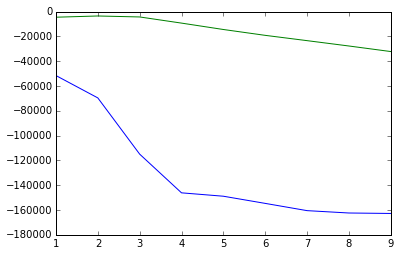

## Generate predictions and save ouput in csv format for submission:

In [17]:
DATA_TEST_PATH = '../Data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [21]:
OUTPUT_PATH = '../Data/result.csv' 
# TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
print(y_pred.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

(568238,)
